# JOB ANALYSIS

### OBJECTIVE

The process of determining which jobs will demand specific qualifications in the future is known as job analysis. This information can then be utilised to develop a computer that properly forecasts which jobs will require these talents. 
  This data will be cleaned and organised before being processed with machine learning techniques such as KNN, SVM, and Decision tree. The most accurate algorithm will be tested on a confusion matrix and heatmap to determine if it delivers more accurate predictions than other approaches. Finally, Power BI can be used by users who are looking for work or have recently graduated to depict their career path.

### GOAL OF THE PROJECT

The project's purpose is to inform those who are looking for job vacancies in the United States of America about which jobs have and how many job opportunities in various states of the United States of America.

### IMPORTING LIBRARIES

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC # "Support vector classifier"  
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


from sklearn.metrics import mean_squared_error, mean_squared_log_error

### IMPORTING DATASET

In [2]:
df = pd.read_csv("C:\\Users\\91934\\OneDrive\\Desktop\\job_analysis.csv")

In [3]:
df

,State FIPS,Area Name,Occupation Code,Occupation Name,Year,2022 opening,Prediction Year,2023 opening,Change,Percent Change,Average Annual Openings
0,1,Alabama,00-0000,"Total, All Occupations",2022,2139020,2023,2202040,63020,2.9,269120
1,1,Alabama,11-1011,Chief Executives,2022,2460,2023,2460,0,0.0,170
2,1,Alabama,11-1021,General and Operations Managers,2022,33020,2023,34260,1240,3.8,3380
3,1,Alabama,11-1031,Legislators,2022,1170,2023,1190,20,1.7,100
4,1,Alabama,11-2011,Advertising and Promotions Managers,2022,70,2023,80,10,14.3,10
...,...,...,...,...,...,...,...,...,...,...,...
33416,9,Connecticut,53-7062,"Laborers and Freight, Stock, and Material Move...",2022,27720,2023,30890,3170,11.4,5410
33417,9,Connecticut,53-7064,"Packers and Packagers, Hand",2022,4900,2023,5220,320,6.5,860
33418,9,Connecticut,53-7065,Stockers and Order Fillers,2022,22880,2023,24250,1370,6.0,4320
33419,9,Connecticut,53-7081,Refuse and Recyclable Material Collectors,2022,1030,2023,1060,30,2.9,150


### NATURE OF THE DATASET

In [4]:
print("Dataset contains", df.shape[0], "samples and" , df.shape[1], "features")

Dataset contains 33421 samples and 11 features


### DATASET ATTRIBUTES

In [5]:
df.columns

Index(['State FIPS', 'Area Name', 'Occupation Code', 'Occupation Name', 'Year',
       '2022 opening', 'Prediction Year', '2023 opening', 'Change',
       'Percent Change', 'Average Annual Openings'],
      dtype='object')

### STATISTICAL OVERVIEW

In [6]:
df.head()

,State FIPS,Area Name,Occupation Code,Occupation Name,Year,2022 opening,Prediction Year,2023 opening,Change,Percent Change,Average Annual Openings
0,1,Alabama,00-0000,"Total, All Occupations",2022,2139020,2023,2202040,63020,2.9,269120
1,1,Alabama,11-1011,Chief Executives,2022,2460,2023,2460,0,0.0,170
2,1,Alabama,11-1021,General and Operations Managers,2022,33020,2023,34260,1240,3.8,3380
3,1,Alabama,11-1031,Legislators,2022,1170,2023,1190,20,1.7,100
4,1,Alabama,11-2011,Advertising and Promotions Managers,2022,70,2023,80,10,14.3,10


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33421 entries, 0 to 33420
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   State FIPS               33421 non-null  int64  
 1   Area Name                33421 non-null  object 
 2   Occupation Code          33421 non-null  object 
 3   Occupation Name          33421 non-null  object 
 4   Year                     33421 non-null  int64  
 5   2022 opening             33421 non-null  int64  
 6   Prediction Year          33421 non-null  int64  
 7   2023 opening             33421 non-null  int64  
 8   Change                   33421 non-null  int64  
 9   Percent Change           33421 non-null  float64
 10  Average Annual Openings  33421 non-null  int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 2.8+ MB


In [8]:
df.describe()

,State FIPS,Year,2022 opening,Prediction Year,2023 opening,Change,Percent Change,Average Annual Openings
count,33421.000000,33421.0,3.342100e+04,33421.0,3.342100e+04,3.342100e+04,33421.000000,3.342100e+04
mean,30.133120,2022.0,9.180817e+03,2023.0,9.615545e+03,4.347270e+02,3.765770,1.226659e+03
std,16.909456,0.0,1.772047e+05,0.0,1.870848e+05,1.035007e+04,6.212816,2.476801e+04
min,1.000000,2022.0,0.000000e+00,2023.0,0.000000e+00,-7.810000e+03,-100.000000,0.000000e+00
25%,17.000000,2022.0,2.500000e+02,2023.0,2.600000e+02,0.000000e+00,0.000000,3.000000e+01
50%,30.000000,2022.0,8.300000e+02,2023.0,8.600000e+02,2.000000e+01,2.900000,9.000000e+01
75%,44.000000,2022.0,3.020000e+03,2023.0,3.130000e+03,1.000000e+02,5.600000,3.500000e+02
max,78.000000,2022.0,1.800400e+07,2023.0,1.929620e+07,1.292200e+06,100.000000,2.684260e+06


### CHECKING NULL VALUES

In [9]:
df.isnull()  

,State FIPS,Area Name,Occupation Code,Occupation Name,Year,2022 opening,Prediction Year,2023 opening,Change,Percent Change,Average Annual Openings
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
33416,False,False,False,False,False,False,False,False,False,False,False
33417,False,False,False,False,False,False,False,False,False,False,False
33418,False,False,False,False,False,False,False,False,False,False,False
33419,False,False,False,False,False,False,False,False,False,False,False


In [10]:
df.isnull().sum()

State FIPS                 0
Area Name                  0
Occupation Code            0
Occupation Name            0
Year                       0
2022 opening               0
Prediction Year            0
2023 opening               0
Change                     0
Percent Change             0
Average Annual Openings    0
dtype: int64

### TO REMOVE DUPLICATES

In [11]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
33416    False
33417    False
33418    False
33419    False
33420    False
Length: 33421, dtype: bool

In [12]:
print(df.corr())

                         State FIPS  Year  2022 opening  Prediction Year  \
State FIPS                 1.000000   NaN     -0.005688              NaN   
Year                            NaN   NaN           NaN              NaN   
2022 opening              -0.005688   NaN      1.000000              NaN   
Prediction Year                 NaN   NaN           NaN              NaN   
2023 opening              -0.005889   NaN      0.999857              NaN   
Change                    -0.009052   NaN      0.952004              NaN   
Percent Change            -0.042699   NaN      0.008101              NaN   
Average Annual Openings   -0.006342   NaN      0.994843              NaN   

                         2023 opening    Change  Percent Change  \
State FIPS                  -0.005889 -0.009052       -0.042699   
Year                              NaN       NaN             NaN   
2022 opening                 0.999857  0.952004        0.008101   
Prediction Year                   NaN       NaN

C:\Users\91934\AppData\Local\Temp\ipykernel_23152\4212406737.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())


### TO REMOVE ROW WITH VALUE 0

In [13]:
df[~(df==0).all(axis=1)]

,State FIPS,Area Name,Occupation Code,Occupation Name,Year,2022 opening,Prediction Year,2023 opening,Change,Percent Change,Average Annual Openings
0,1,Alabama,00-0000,"Total, All Occupations",2022,2139020,2023,2202040,63020,2.9,269120
1,1,Alabama,11-1011,Chief Executives,2022,2460,2023,2460,0,0.0,170
2,1,Alabama,11-1021,General and Operations Managers,2022,33020,2023,34260,1240,3.8,3380
3,1,Alabama,11-1031,Legislators,2022,1170,2023,1190,20,1.7,100
4,1,Alabama,11-2011,Advertising and Promotions Managers,2022,70,2023,80,10,14.3,10
...,...,...,...,...,...,...,...,...,...,...,...
33416,9,Connecticut,53-7062,"Laborers and Freight, Stock, and Material Move...",2022,27720,2023,30890,3170,11.4,5410
33417,9,Connecticut,53-7064,"Packers and Packagers, Hand",2022,4900,2023,5220,320,6.5,860
33418,9,Connecticut,53-7065,Stockers and Order Fillers,2022,22880,2023,24250,1370,6.0,4320
33419,9,Connecticut,53-7081,Refuse and Recyclable Material Collectors,2022,1030,2023,1060,30,2.9,150


### TO VIEW CAEGORICAL

In [14]:
categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :', categorical)

There are 3 categorical variables

The categorical variables are : ['Area Name', 'Occupation Code', 'Occupation Name']


In [15]:
df[categorical].head()

,Area Name,Occupation Code,Occupation Name
0,Alabama,00-0000,"Total, All Occupations"
1,Alabama,11-1011,Chief Executives
2,Alabama,11-1021,General and Operations Managers
3,Alabama,11-1031,Legislators
4,Alabama,11-2011,Advertising and Promotions Managers


### CHECK MISSING VALUE IN CATEGORIAL VARAIBLES

In [16]:
df[categorical].isnull().sum()

Area Name          0
Occupation Code    0
Occupation Name    0
dtype: int64

In [17]:
type(df[categorical])

pandas.core.frame.DataFrame

### CHECK NUMERICAL VARAIBLES

In [18]:
cat1 = [var for var in categorical if df[var].isnull().sum()!=0]
print(df[cat1].isnull().sum())

Series([], dtype: float64)


## EXPLORE PROBLEMS WITHIN NUMERICAL VARIABLES

### DISPLAY NUMEERICAL VARIABLE COLUMN NAMES

In [19]:
numerical = [var for var in df.columns if df[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :', numerical)

There are 8 numerical variables

The numerical variables are : ['State FIPS', 'Year', '2022 opening', 'Prediction Year', '2023 opening', 'Change', 'Percent Change', 'Average Annual Openings']


### DISPLAY FIRST 5 ROWS OF NUMERICAL VARIABLE

In [20]:
df[numerical].head()

,State FIPS,Year,2022 opening,Prediction Year,2023 opening,Change,Percent Change,Average Annual Openings
0,1,2022,2139020,2023,2202040,63020,2.9,269120
1,1,2022,2460,2023,2460,0,0.0,170
2,1,2022,33020,2023,34260,1240,3.8,3380
3,1,2022,1170,2023,1190,20,1.7,100
4,1,2022,70,2023,80,10,14.3,10


### TO DISPLAY THE MISSING ALUE IN THE NUERICAL VAARIABLE

In [21]:
df[numerical].isnull().sum()

State FIPS                 0
Year                       0
2022 opening               0
Prediction Year            0
2023 opening               0
Change                     0
Percent Change             0
Average Annual Openings    0
dtype: int64

### TARGET VARIABLE

In [22]:
df['2023 opening'].value_counts()

60         453
80         451
70         446
90         440
100        406
          ... 
17110        1
9240         1
23170        1
1512460      1
24250        1
Name: 2023 opening, Length: 3211, dtype: int64

### SPLITTING THE FEATURES AND DATA

In [23]:
#split dataset in features and target variable
feature_cols = ['State FIPS','2022 opening']
X = df[feature_cols]# Features
y = df['2023 opening']

 ### NO OF ROWS IN X - FEATURE

In [24]:
X.shape

(33421, 2)

### NO OF ROWS IN Y

In [25]:
y.shape

(33421,)

### SPLITTING THE DATA INTO TRIAN DATA AN TEST DATA

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test


In [27]:
print(X.shape,X_train.shape,y_test.shape)

(33421, 2) (23394, 2) (10027,)


### PREDICTION USING DECISION TREE ALGORITHM

In [28]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

### ACCURACY USING DECISION TREE

In [29]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)


Accuracy: 22.22000598384362


### OPTIMISING DECISION TREE ACCURACY

In [30]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 3.390844719258004


### PREDICTION USING - K NEAREST NEIGHBOR (KNN) ALGORITHM

In [31]:
#split dataset in features and target variable
feature_cols = ['2022 opening','Change']
A = df[feature_cols]# Features
B = df['2023 opening']

In [32]:
# Split dataset into training set and test set
A_train, A_test, B_train, B_test = train_test_split(A, B, test_size=0.3, random_state=1) # 70% training and 30% test


In [33]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(A_train, B_train)

KNeighborsClassifier(n_neighbors=3)

In [34]:
B_pred = knn.predict(A_test)

In [35]:
accuracy = accuracy_score(B_test, B_pred)
print("Accuracy:", accuracy*100)

Accuracy: 63.53844619527277


### PREDICTION USING - SUPPORT VECTOR MACHINES (SVM) ALGORITHM

In [36]:
#Creating Training Data and Test Data

y = df['2023 opening']

x = df.iloc[:, [0,5,8]].values

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) # 70% training and 30% test


In [38]:
#Create a svm Classifier

clf = SVC(kernel='linear', random_state=0)  
 # Linear Kernel

#Train the model using the training sets
clf.fit(x_train, y_train)


SVC(kernel='linear', random_state=0)

In [39]:
#Predict the response for test dataset
y_pred = clf.predict(x_test)


In [40]:
#Import scikit-learn metrics module for accuracy calculation

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred)*100)

Accuracy: 87.93258202852299


### CONFUSION MATRIX

In [41]:
# Create a confusion matrix 
confusion_matrix = confusion_matrix(y_test, y_pred)

In [42]:
confusion_matrix

array([[13,  0,  0, ...,  0,  0,  0],
       [ 0, 34,  0, ...,  0,  0,  0],
       [ 0,  0, 75, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  1,  0,  0],
       [ 0,  0,  0, ...,  1,  0,  0]], dtype=int64)

### VISUALIZATION USING VARIOUS CHARTS

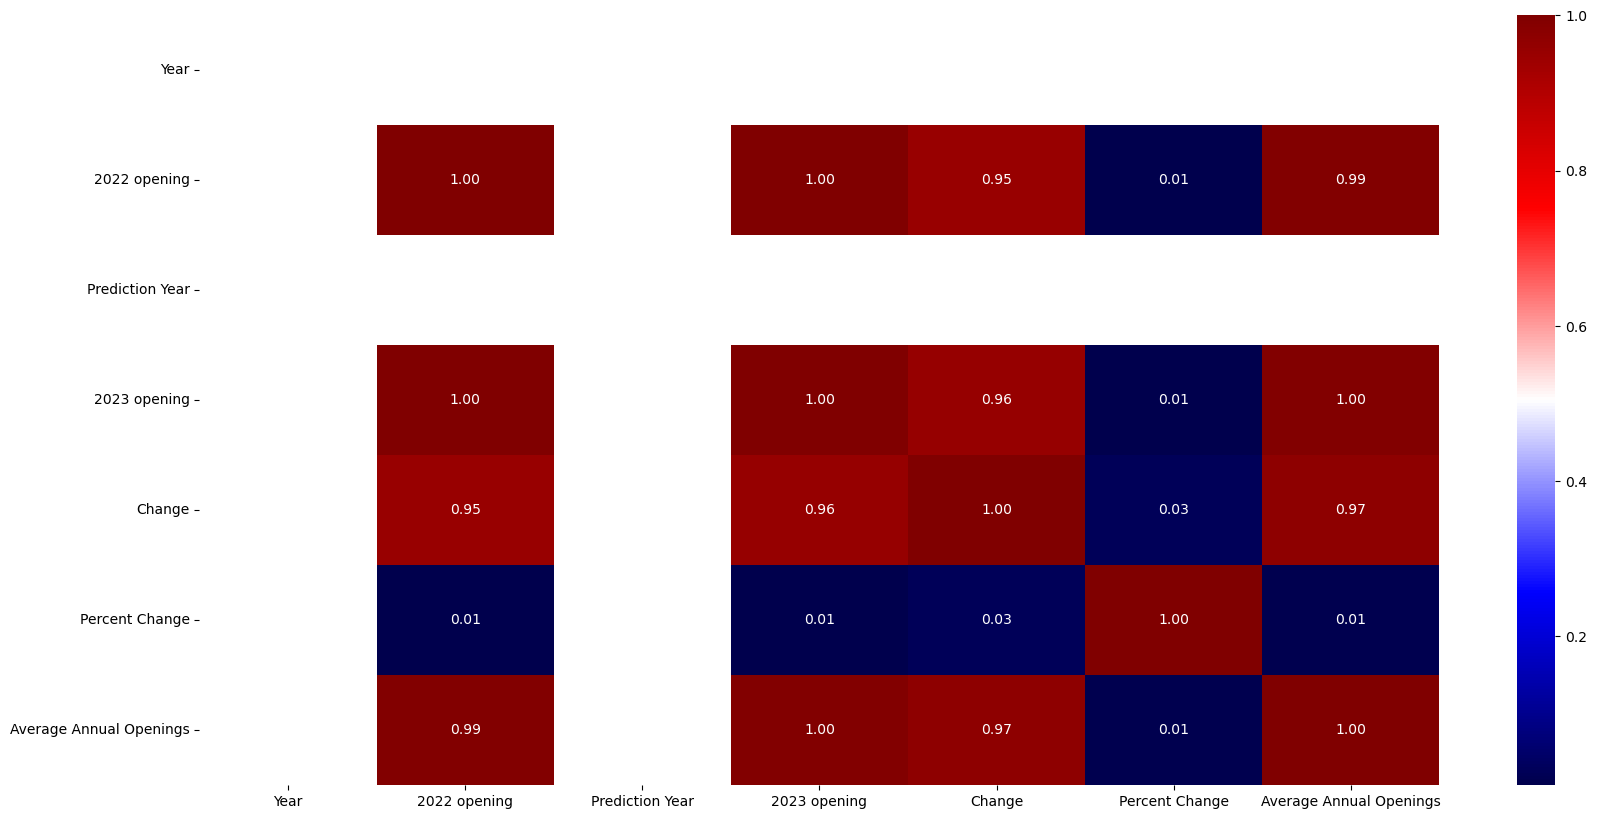

In [43]:
plt.figure(figsize=(20,10))
sns.heatmap(data=df.iloc[:,4:].corr(),annot=True,fmt='.2f',cmap='seismic')
plt.show()

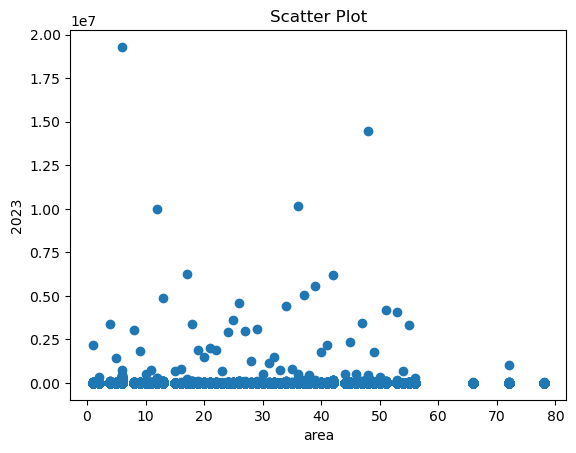

In [44]:
# Scatter plot with day against tip
plt.scatter(df['State FIPS'], df['2023 opening'])

# Adding Title to the Plot
plt.title("Scatter Plot")

# Setting the X and Y labels
plt.xlabel('area')
plt.ylabel('2023')

plt.show()


In [45]:
from bokeh.plotting import figure, output_file, show
from bokeh.palettes import magma
import pandas as pd

graph = figure(title = "job difference in 2022 & 2023 Scatter Graph")

color = magma(256)

# plotting the graph
graph.scatter(df['2022 opening'], df['2023 opening'], color=color)
show(graph)

##### VISUALIZATION OF EMPLOYMENT ACCORDING TO AREA

<Axes: ylabel='2023 opening'>

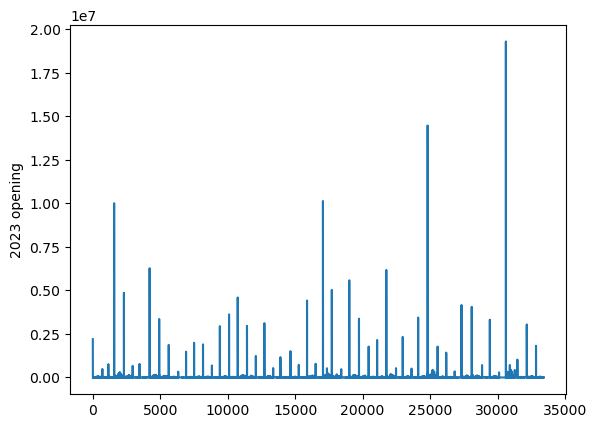

In [46]:
# import module
import seaborn as sns
import pandas

# plotting lineplot
sns.lineplot(df['2023 opening'])

<Axes: xlabel='Area Name', ylabel='count'>

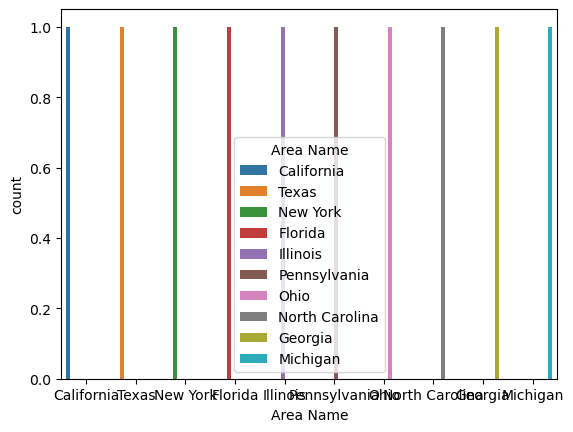

In [47]:
top_10 = df.nlargest(10, '2023 opening')
sns.countplot(x = 'Area Name', data = top_10, hue ='Area Name')

<Axes: >

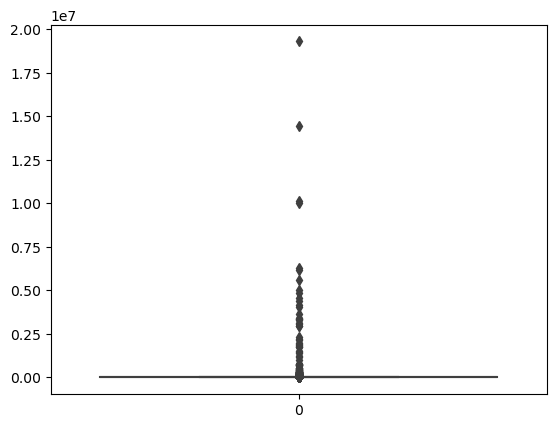

In [48]:
sns.boxplot(df['2023 opening'])

<Axes: >

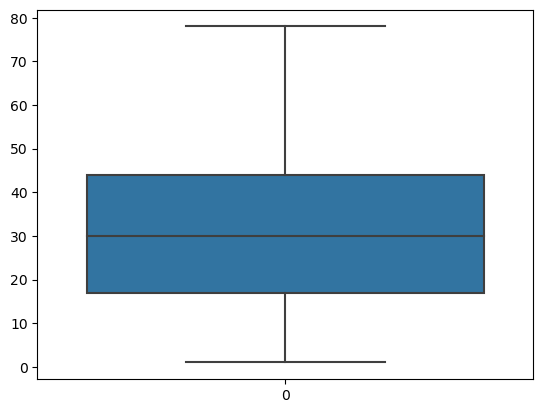

In [49]:
sns.boxplot(df['State FIPS'])

##### TOP 10 JOB VACANCY STATES

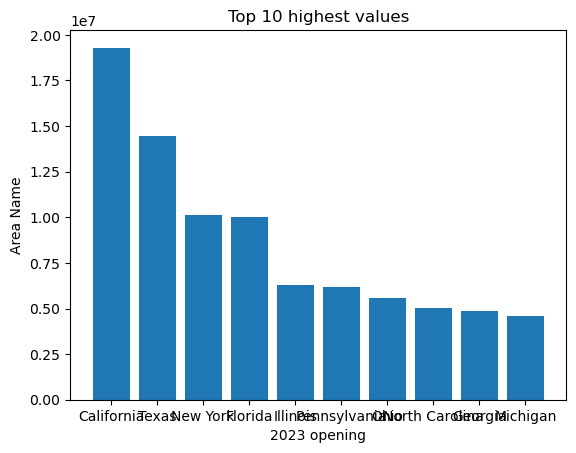

In [50]:
# Select the top 10 highest values
top_10 = df.nlargest(10, '2023 opening')

# Create a bar plot of the top 10 highest values
plt.bar(top_10['Area Name'], top_10['2023 opening'])
plt.xlabel('2023 opening')
plt.ylabel('Area Name')
plt.title('Top 10 highest values')
plt.show()

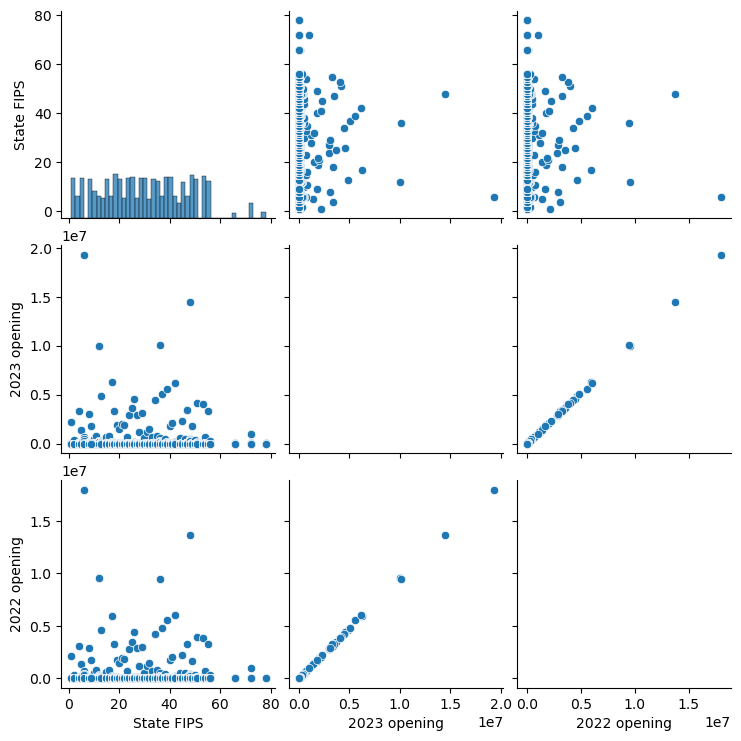

In [51]:
columns=['Area Name', 'State FIPS', '2023 opening', '2022 opening']
sns.pairplot(df[columns])